#Mouse Navigating Maze in Virtual Reality

## Setup evnironment and plotting

In [11]:
import os
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
#sns.set_context('notebook')

## Load covariates and maze information

In [12]:
basePath = '/Users/MJAY-MAC/Desktop/mVR-example-master 2'

In [13]:
with open(os.path.join(basePath,'covariates.json')) as fp:    
    params = pd.DataFrame(json.load(fp))

In [14]:
maze = np.load(os.path.join(basePath,'maze.npy')).transpose(2, 0, 1)
reward = np.load(os.path.join(basePath,'reward.npy'))

## Plot maze and trajectory through maze

A maze consists of trapazoidal patches, called `branches`, which are stiched together.

There is also one reward location, which is also a trapazoidal patch.

In [15]:
def draw(maze, reward):
    for branch in maze:
        plt.fill(branch[0,:], branch[1,:], edgecolor=[0.7,0.7,0.7], facecolor=[0.7,0.7,0.7], lw=1.5);
    plt.fill(reward[0], reward[1], edgecolor=[0.9,0.9,0.9], facecolor=[0.9,0.9,0.9]);
    plt.axis('off')
    #print branch

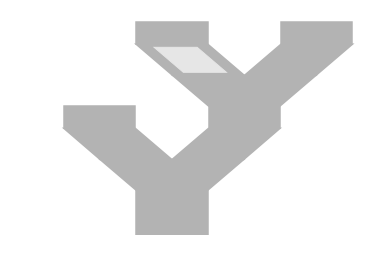

In [16]:
draw(maze, reward)

In [17]:
def trace(params, trial):
    if not isinstance(trial, (list, tuple)):
        trial = [trial]
    for t in trial:
        plt.plot(params.xMazePos[params.trialNum == t],params.yMazePos[params.trialNum == t]);
        print t

2


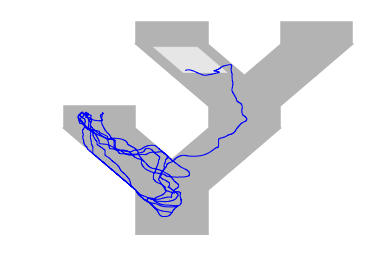

In [18]:
draw(maze, reward)
trace(params, 2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


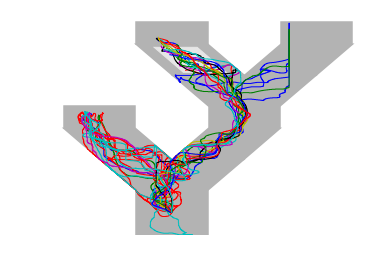

In [19]:
draw(maze, reward)
trace(params, range(0,18))

In [20]:

params

,corPos,corWidth,deadEnd,itiPeriod,trialNum,trialWater,xMazePos,xSpeed,yMazePos,ySpeed
0,15.0,30,0,1,0,0,0.0,19.7365,10.0,-0.5054
1,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612
2,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612
3,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612
4,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612
5,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612
6,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612
7,15.0,30,0,1,0,0,0.0,27.5247,10.0,-0.6170
8,15.0,30,0,1,0,0,0.0,23.6971,10.0,-0.6178
9,15.0,30,0,1,0,0,0.0,27.5247,10.0,-0.6170


In [21]:
params['corNorm'] = params.corPos/params.corWidth

In [22]:
trials = params.groupby(params.trialNum).mean()

(array([  1.,   0.,   0.,  10.,  12.,  24.,  15.,  23.,  19.,  10.]),
 array([ 0.31832195,  0.35998703,  0.4016521 ,  0.44331717,  0.48498225,
         0.52664732,  0.5683124 ,  0.60997747,  0.65164254,  0.69330762,
         0.73497269]),
 <a list of 10 Patch objects>)

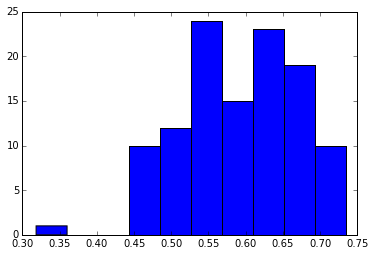

In [23]:
plt.hist(trials.corNorm)

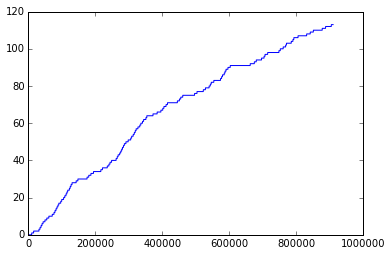

In [24]:
plt.plot(params.trialNum)

In [25]:
params

,corPos,corWidth,deadEnd,itiPeriod,trialNum,trialWater,xMazePos,xSpeed,yMazePos,ySpeed,corNorm
0,15.0,30,0,1,0,0,0.0,19.7365,10.0,-0.5054,0.500000
1,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612,0.500000
2,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612,0.500000
3,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612,0.500000
4,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612,0.500000
5,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612,0.500000
6,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612,0.500000
7,15.0,30,0,1,0,0,0.0,27.5247,10.0,-0.6170,0.500000
8,15.0,30,0,1,0,0,0.0,23.6971,10.0,-0.6178,0.500000
9,15.0,30,0,1,0,0,0.0,27.5247,10.0,-0.6170,0.500000


In [26]:

len(params)

909958

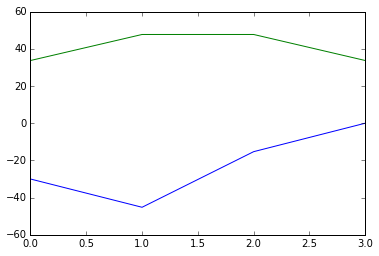

In [27]:
plt.plot(maze[2].T)

In [28]:
maze


array([[[-15. , -15. ,  15. ,  15. ],
        [  0. ,  20. ,  20. ,   0. ]],

       [[-15. , -30. ,  30. ,  15. ],
        [ 20. ,  33.7,  33.7,  20. ]],

       [[-30. , -45.2, -15.3,   0. ],
        [ 33.7,  47.7,  47.7,  33.7]],

       [[  0. ,  15.3,  45.2,  30. ],
        [ 33.7,  47.7,  47.7,  33.7]],

       [[-45.2, -45.2, -15.3, -15.3],
        [ 47.7,  57.7,  57.7,  47.7]],

       [[ 15.3,  15.3,  45.2,  45.2],
        [ 47.7,  57.7,  57.7,  47.7]],

       [[ 15.3,   0.3,  60.2,  45.2],
        [ 57.7,  71.4,  71.4,  57.7]],

       [[  0.3, -15. ,  15. ,  30.3],
        [ 71.4,  85.4,  85.4,  71.4]],

       [[ 30.3,  45.6,  75.5,  60.2],
        [ 71.4,  85.4,  85.4,  71.4]],

       [[-15. , -15. ,  15. ,  15. ],
        [ 85.4,  95.4,  95.4,  85.4]],

       [[ 45.6,  45.6,  75.5,  75.5],
        [ 85.4,  95.4,  95.4,  85.4]]])

In [ ]:
import matplotlib.path as mPath
def find_pt(params):
    r1 = mPath.Path(np.array(maze[0].T))
    r2 = mPath.Path(np.array(maze[1].T))
    r3 = mPath.Path(np.array(maze[2].T)) #first left incorrect branch
    r4 = mPath.Path(np.array(maze[3].T))
    r5 = mPath.Path(np.array(maze[4].T))
    r6 = mPath.Path(np.array(maze[5].T))
    r7 = mPath.Path(np.array(maze[6].T))
    r8 = mPath.Path(np.array(maze[7].T))
    r9 = mPath.Path(np.array(maze[8].T)) #right right incorrect branch
    r10 = mPath.Path(np.array(maze[9].T))
    r11 = mPath.Path(np.array(maze[10].T))
    
    #if not isinstance(trial, (list, tuple)):
     #       trial = [trial]
            
    allpts = np.array([[params.xMazePos],[params.yMazePos]])
    ops = allpts.T
    for i in range(len(params)):
        print i
        POI = (ops[i][0][0],ops[i][0][1])
        if r1.contains_point(POI):
            params['Region'][i] = 1
            continue
        elif r2.contains_point(POI):
            params['Region'][i] = 2
            continue
        elif r3.contains_point(POI):
            params['Region'][i] = 3
            continue
        elif r4.contains_point(POI):
            params['Region'][i] = 4
            continue
        elif r5.contains_point(POI):
            params['Region'][i] = 5
            continue
        elif r6.contains_point(POI):
            params['Region'][i] = 6
            continue
        elif r7.contains_point(POI):
            params['Region'][i] = 7
            continue
        elif r8.contains_point(POI):
            params['Region'][i] = 8
            continue
        elif r9.contains_point(POI):
            params['Region'][i] = 9
            continue
        elif r10.contains_point(POI):
            params['Region'][i] = 10
            continue
        elif r11.contains_point(POI):
            params['Region'][i] = 11
            continue
            
            
    

find_pt(params)

   
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
10

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



4554
4555
4556
4557
4558
4559
4560
4561
4562
4563
4564
4565
4566
4567
4568
4569
4570
4571
4572
4573
4574
4575
4576
4577
4578
4579
4580
4581
4582
4583
4584
4585
4586
4587
4588
4589
4590
4591
4592
4593
4594
4595
4596
4597
4598
4599
4600
4601
4602
4603
4604
4605
4606
4607
4608
4609
4610
4611
4612
4613
4614
4615
4616
4617
4618
4619
4620
4621
4622
4623
4624
4625
4626
4627
4628
4629
4630
4631
4632
4633
4634
4635
4636
4637
4638
4639
4640
4641
4642
4643
4644
4645
4646
4647
4648
4649
4650
4651
4652
4653
4654
4655
4656
4657
4658
4659
4660
4661
4662
4663
4664
4665
4666
4667
4668
4669
4670
4671
4672
4673
4674
4675
4676
4677
4678
4679
4680
4681
4682
4683
4684
4685
4686
4687
4688
4689
4690
4691
4692
4693
4694
4695
4696
4697
4698
4699
4700
4701
4702
4703
4704
4705
4706
4707
4708
4709
4710
4711
4712
4713
4714
4715
4716
4717
4718
4719
4720
4721
4722
4723
4724
4725
4726
4727
4728
4729
4730
4731
4732
4733
4734
4735
4736
4737
4738
4739
4740
4741
4742
4743
4744
4745
4746
4747
4748
4749
4750
4751
4752
4753

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



8673
8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698
8699
8700
8701
8702
8703
8704
8705
8706
8707
8708
8709
8710
8711
8712
8713
8714
8715
8716
8717
8718
8719
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729
8730
8731
8732
8733
8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798
8799
8800
8801
8802
8803
8804
8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863
8864
8865
8866
8867
8868
8869
8870
8871
8872

In [ ]:
def correct(params,trial,trials):
    for t in trial:
         coords = np.array([[params.xMazePos[params.trialNum == t]],[params.yMazePos[params.trialNum == t]]])
            #^whole trajectory of animal
        
        print len(coords.T)
        
        for pt in coords.T:
            
            #print trials.corPos[t]
            
            if three.contains_point((pt[0][0],pt[0][1])):
                trials.loc[t,'correctTrack'] = 0
                print (pt[0][0],pt[0][1])
                break
            else:
                trials.loc[t,'correctTrack'] = 1
       
            
correct(params,5,trials)   

In [49]:
allpts = np.array([[params.xMazePos],[params.yMazePos]])

In [61]:
two = mPath.Path(np.array(maze[1].T))

In [62]:
two.contains_point((ops[0][0][0],ops[0][0][1]))

0

In [66]:
ops[1500][0][1]

37.799999999999997

In [32]:
params

,corPos,corWidth,deadEnd,itiPeriod,trialNum,trialWater,xMazePos,xSpeed,yMazePos,ySpeed,corNorm,Region
0,15.0,30,0,1,0,0,0.0,19.7365,10.0,-0.5054,0.500000,1
1,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612,0.500000,1
2,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612,0.500000,1
3,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612,0.500000,1
4,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612,0.500000,1
5,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612,0.500000,1
6,15.0,30,0,1,0,0,0.0,23.6306,10.0,-0.5612,0.500000,1
7,15.0,30,0,1,0,0,0.0,27.5247,10.0,-0.6170,0.500000,1
8,15.0,30,0,1,0,0,0.0,23.6971,10.0,-0.6178,0.500000,1
9,15.0,30,0,1,0,0,0.0,27.5247,10.0,-0.6170,0.500000,1
